### Example Naive bayes in text processing on Sastrawi and Nltk

In [6]:
import pandas as pd
import nltk
import re
import requests
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from nltk import word_tokenize
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [7]:
products = pd.read_csv('../handle_sentiment/dataset/products_terbaruu.csv')
reviews = pd.read_csv('../handle_sentiment/dataset/reviews_.csv')

In [8]:
products = products[['id', 'name', 'price', 'rating', 'slug_product', 'image_product']]
reviews = reviews[['product', 'name','comment', 'rating', 'sentiment', 'user']]

In [9]:
reviews['sentiment'].value_counts()

sentiment
negatif    637
positif    635
Name: count, dtype: int64

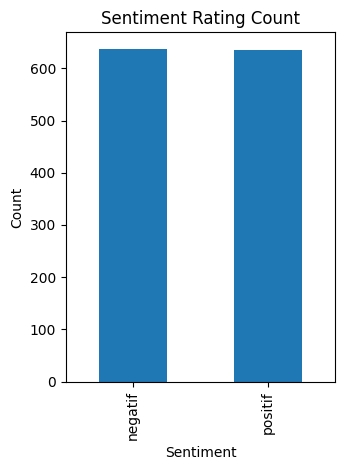

In [10]:
plt.subplot(1, 2, 2)
reviews['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Rating Count')

plt.tight_layout()
plt.show()

### word cloud positif

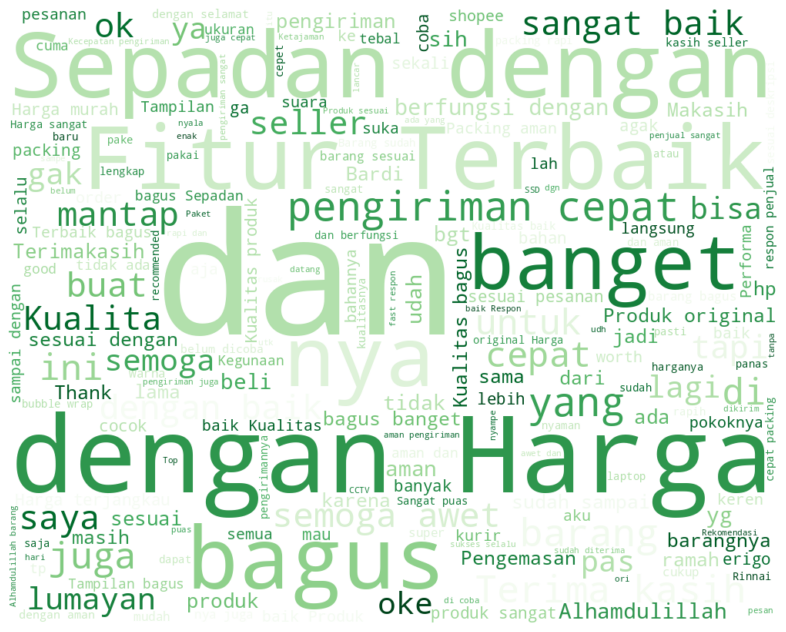

In [11]:
# wordcloud review
data_pos = reviews[reviews['sentiment'] == 'positif']

all_text = ' '.join(word for word in data_pos['comment'])
wordcloud = WordCloud(colormap='Greens', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()





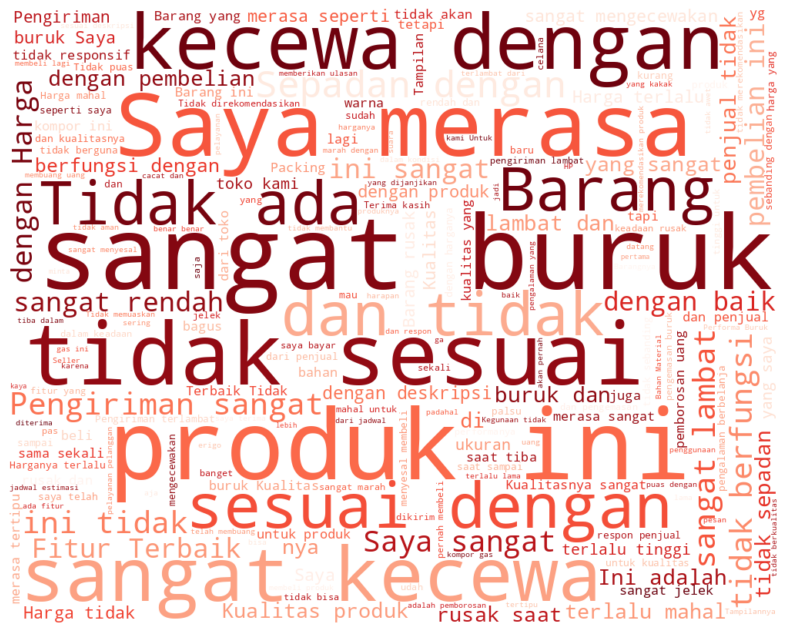

In [12]:
data_neg = reviews[reviews['sentiment'] == 'negatif']

all_text = ' '.join(word for word in data_neg['comment'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


### Teks Cleaning

In [13]:
# cleaning text
def cleaning_text(text):
    # remove url
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text =  url_pattern.sub(r'', text)

    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)

    # remove mention handle user (@)
    text = re.sub(r'@[\w]*', ' ', text)

    # remove punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, " ")

    # remove extra whitespace
    text = text.strip()

    # lowercase
    text = text.lower()
    return text

### Custom Stopword List for Indonesian Text Preprocessing

In [14]:
nltk.download('stopwords')
nltk.download('punkt')

rama_stopword = "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt"
yutomo_stopword = "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt"
fpmipa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt"
sastrawi_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt"
aliakbar_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt"
pebahasa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt"
elang_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"
nltk_stopword = stopwords.words('indonesian')

path_stopwords = [rama_stopword, yutomo_stopword, fpmipa_stopword, sastrawi_stopword,
                  aliakbar_stopword, pebahasa_stopword, elang_stopword]

# combine stopwords
stopwords_l = nltk_stopword
for path in path_stopwords:
    response = requests.get(path)
    stopwords_l += response.text.split('\n')

custom_st = '''
Bagus sekali, Murah sedang ada promo. Barang OK, sudah dipakai lancar jaya, pengiriman cepat, semoga awet. Terima kasih seler terima kasih kurir.
'''

# create dictionary with unique stopword
st_words = set(stopwords_l)
custom_stopword = set(custom_st.split())

# result stopwords
stop_words = st_words | custom_stopword
print(f'Stopwords: {list(stop_words)[:5]}')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/holyraven/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/holyraven/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Stopwords: ['saja', 'sampai', 'akhirnya', 'janganlah', 'dari']


### remove stopwords

In [15]:
def remove_stopword(text, stop_words=stop_words):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

### stemming and lemmatization

In [16]:
def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

### tokenization

In [17]:
def tokenize(text):
    return word_tokenize(text)

### Example Text Preprocessing Pipeline for Indonesian Text Data

In [18]:
# example
text = 'Produk oke sesuai deskripsi dan normal berfungsi, pengiriman rapih dan buble wrap, dicoba langsung oke, respond sangat cepat, maaf baru beri nilai, belum sempat coba.. Recommend.. Dan langganan ahhh, sukses seller n shoope.'
print(f'Original text: \n{text}\n')

# cleaning text and lowercase
text = cleaning_text(text)
print(f'Cleaned text: \n{text}\n')

# remove stopwords
text = remove_stopword(text)
print(f'Removed stopword: \n{text}\n')

# stemming and lemmatization
text = stemming_and_lemmatization(text)
print(f'Stemmed and lemmatized: \n{text}\n')

# tokenization
text = tokenize(text)
print(f'Tokenized: \n{text}')

Original text: 
Produk oke sesuai deskripsi dan normal berfungsi, pengiriman rapih dan buble wrap, dicoba langsung oke, respond sangat cepat, maaf baru beri nilai, belum sempat coba.. Recommend.. Dan langganan ahhh, sukses seller n shoope.

Cleaned text: 
produk oke sesuai deskripsi dan normal berfungsi  pengiriman rapih dan buble wrap  dicoba langsung oke  respond sangat cepat  maaf baru beri nilai  belum sempat coba   recommend   dan langganan ahhh  sukses seller n shoope

Removed stopword: 
produk oke deskripsi normal berfungsi rapih buble wrap dicoba oke respond cepat maaf nilai coba recommend langganan ahhh sukses seller n shoope



Stemmed and lemmatized: 
produk oke deskripsi normal fungsi rapih buble wrap coba oke respond cepat maaf nilai coba recommend langgan ahhh sukses seller n shoope

Tokenized: 
['produk', 'oke', 'deskripsi', 'normal', 'fungsi', 'rapih', 'buble', 'wrap', 'coba', 'oke', 'respond', 'cepat', 'maaf', 'nilai', 'coba', 'recommend', 'langgan', 'ahhh', 'sukses', 'seller', 'n', 'shoope']


### pipeline preprocess

In [19]:
def text_preprocessing_indonesia(text):
    # cleaning text and lowercase
    output = cleaning_text(text)

    # remove stopwords
    output = remove_stopword(output)

    # stemming and lemmatization
    output = stemming_and_lemmatization(output)

    # tokenization
    output = tokenize(output)

    return output

### test pipeline preprocess

In [20]:
text = 'Produk oke sesuai deskripsi dan normal berfungsi, pengiriman rapih dan buble wrap, dicoba langsung oke, respond sangat cepat, maaf baru beri nilai, belum sempat coba.. Recommend.. Dan langganan ahhh, sukses seller n shoope.'
text_preprocessing_indonesia(text)

['produk',
 'oke',
 'deskripsi',
 'normal',
 'fungsi',
 'rapih',
 'buble',
 'wrap',
 'coba',
 'oke',
 'respond',
 'cepat',
 'maaf',
 'nilai',
 'coba',
 'recommend',
 'langgan',
 'ahhh',
 'sukses',
 'seller',
 'n',
 'shoope']

### Preprocessing Text Data in a DataFrame

In [21]:
reviews['comment'] = reviews['comment'].apply(text_preprocessing_indonesia)

### Balancing the Dataset for Sentiment Analysis

In [22]:
negative_reviews = reviews[reviews['sentiment'] == 'negatif'].sample(n=min(620, len(reviews[reviews['sentiment'] == 'negatif'])), replace=True)
positive_reviews = reviews[reviews['sentiment'] == 'positif'].sample(n=min(620, len(reviews[reviews['sentiment'] == 'positif'])), replace=True)
sampled_reviews = pd.concat([negative_reviews, positive_reviews])

### Encoding Sentiment Labels for Machine Learning

In [23]:
encoder = LabelEncoder()
sampled_reviews['sentiment_encoded'] = encoder.fit_transform(sampled_reviews['sentiment'])


### Splitting the Dataset for Model Training and Testing

In [24]:
X_train, X_test, y_train, y_test = train_test_split(sampled_reviews['comment'], sampled_reviews['sentiment_encoded'], test_size=0.2, random_state=42)

In [25]:
X_train = [' '.join(tokens) for tokens in X_train]
X_test = [' '.join(tokens) for tokens in X_test]

tfidf_vectorizer = TfidfVectorizer(max_features=1000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Training a Multinomial Naive Bayes Model for Text Classification

In [26]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

### Making Predictions with the Trained Text Classification Model

In [27]:
y_pred = model.predict(X_test_tfidf)

### Evaluating the Model with a Confusion Matrix

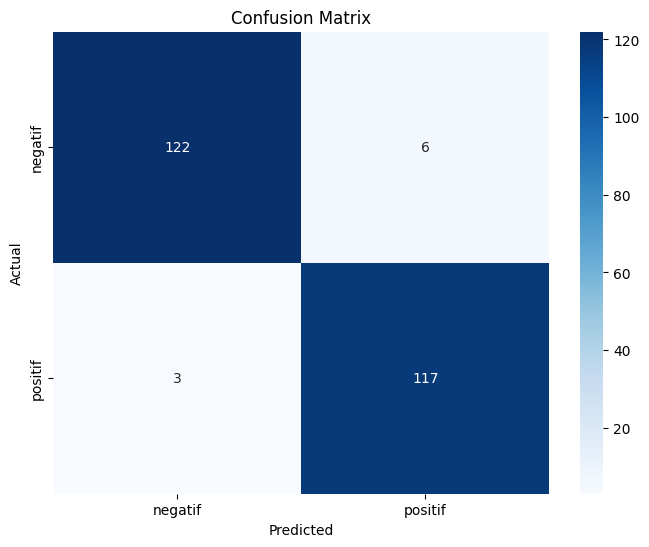

In [28]:
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Evaluating Sentiment Analysis Model Performance

In [29]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=encoder.classes_)

print("Sentiment Analysis Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Sentiment Analysis Accuracy: 0.9637096774193549
Classification Report:
               precision    recall  f1-score   support

     negatif       0.98      0.95      0.96       128
     positif       0.95      0.97      0.96       120

    accuracy                           0.96       248
   macro avg       0.96      0.96      0.96       248
weighted avg       0.96      0.96      0.96       248



In [30]:
test_reviews = ["Produk ini sangat buruk! Saya sangat puas dengan kualitasnya.",
                "Barangnya datang sangat buruk, dan pelayanannya baik.",
                "Harganya sangat terjangkau mengingat kualitas yang ditawarkan"]

predicted_sentiments = []

for review in test_reviews:
    preprocessed_review = text_preprocessing_indonesia(review)
    preprocessed_review_text = ' '.join(preprocessed_review)  # Convert the list of tokens into a single string
    test_review_tfidf = tfidf_vectorizer.transform([preprocessed_review_text])
    predicted_sentiment = model.predict(test_review_tfidf)
    decoded_sentiment = encoder.inverse_transform(predicted_sentiment)
    predicted_sentiments.append(decoded_sentiment[0])

for i in range(len(test_reviews)):
    print(f"Komentar: {test_reviews[i]}")
    print(f"Prediksi Sentimen: {predicted_sentiments[i]}\n")


Komentar: Produk ini sangat buruk! Saya sangat puas dengan kualitasnya.
Prediksi Sentimen: negatif

Komentar: Barangnya datang sangat buruk, dan pelayanannya baik.
Prediksi Sentimen: negatif

Komentar: Harganya sangat terjangkau mengingat kualitas yang ditawarkan
Prediksi Sentimen: positif



### Merge the 'reviews' and 'products' dataframes based on 'product'

In [31]:
merged_df = pd.merge(reviews, products, left_on='product', right_on='id')

### Calculate the average rating for each product based on reviews

In [32]:

average_review_ratings = merged_df.groupby('id')['rating_x'].mean().reset_index()

### Merge the average review ratings back into the 'products' dataframe

In [33]:
products['average_review_rating'] = average_review_ratings['rating_x']

### Calculate the final combined rating as the average of product rating and average review rating

In [34]:
products['combined_rating'] = (products['rating'] + products['average_review_rating']) / 2


### Sort products by highest predicted rating and lowest price

In [35]:
recommended_products = products.sort_values(by=['combined_rating', 'price'], ascending=[False, True])


### Delete Average_review_ratings

In [36]:
recommended_products = recommended_products.drop('average_review_rating', axis=1)


### Delete Rating

In [37]:
recommended_products = recommended_products.drop('rating', axis=1)


### Rename Rating

In [38]:
recommended_products = recommended_products.rename(columns={'combined_rating': 'rating'})

### Print Recommended_products

In [39]:
recommended_products[['name', 'price', 'image_product','rating']]

,name,price,image_product,rating
14,Sandisk Ultra Micro SDXC UHS 128 GB,178000,https://res.cloudinary.com/dv3100rvl/image/upl...,4.220000
12,SanDisk SSD PLUS Solid 240GB SPEED UP/TO 530MB/S,541500,https://res.cloudinary.com/dv3100rvl/image/upl...,4.216667
0,Chino Pants Erigo,129000,https://res.cloudinary.com/dv3100rvl/image/upl...,4.210938
6,Mouse Wireless ROBOT M205 2.4G 1600DPI,89900,https://res.cloudinary.com/dv3100rvl/image/upl...,4.201562
17,TEAMGROUP SSD 2.5 GX2 128GB Grey,220000,https://res.cloudinary.com/dv3100rvl/image/upl...,4.201562
8,Robot TWS Wireless Earphone Airbuds T30,134900,https://res.cloudinary.com/dv3100rvl/image/upl...,4.196875
26,Rinnai Kompor Gas 1 Tungku RI TL 289 / TL289,220900,https://res.cloudinary.com/dv3100rvl/image/upl...,4.196875
28,Rinnai Kompor Gas 1 Tungku RI 301S / 301S,696000,https://res.cloudinary.com/dv3100rvl/image/upl...,4.195312
27,Rinnai Sparepart Burner Head Tornado Kompor Se...,87100,https://res.cloudinary.com/dv3100rvl/image/upl...,4.192188
15,TEAMGROUP SSD M2 SATA 2280 MS30 2TB ( 2000GB ),3020000,https://res.cloudinary.com/dv3100rvl/image/upl...,4.192188


#### Out

In [40]:
output_file = 'recommended_products.pkl'

# Simpan DataFrame ke dalam file pickle
with open(output_file, 'wb') as file:
    pickle.dump(recommended_products, file)

print(f'Recommended products telah disimpan dalam file pickle: {output_file}')

Recommended products telah disimpan dalam file pickle: recommended_products.pkl


In [41]:
with open(output_file, 'rb') as file:
    loaded_recommended_products = pickle.load(file)



loaded_recommended_products

,id,name,price,slug_product,image_product,rating
14,15,Sandisk Ultra Micro SDXC UHS 128 GB,178000,sandisk-ultra-micro-sdxc-uhs-128-gb,https://res.cloudinary.com/dv3100rvl/image/upl...,4.220000
12,13,SanDisk SSD PLUS Solid 240GB SPEED UP/TO 530MB/S,541500,sandisk-ssd-plus-solid-240gb-speed-upto-530mbs,https://res.cloudinary.com/dv3100rvl/image/upl...,4.216667
0,1,Chino Pants Erigo,129000,chino-pants-erigo,https://res.cloudinary.com/dv3100rvl/image/upl...,4.210938
6,7,Mouse Wireless ROBOT M205 2.4G 1600DPI,89900,mouse-wireless-robot-m205-24g-1600dpi,https://res.cloudinary.com/dv3100rvl/image/upl...,4.201562
17,18,TEAMGROUP SSD 2.5 GX2 128GB Grey,220000,teamgroup-ssd-25-gx2-128gb-grey,https://res.cloudinary.com/dv3100rvl/image/upl...,4.201562
8,9,Robot TWS Wireless Earphone Airbuds T30,134900,robot-tws-wireless-earphone-airbuds-t30,https://res.cloudinary.com/dv3100rvl/image/upl...,4.196875
26,27,Rinnai Kompor Gas 1 Tungku RI TL 289 / TL289,220900,rinnai-kompor-gas-1-tungku-ri-tl-289-tl289,https://res.cloudinary.com/dv3100rvl/image/upl...,4.196875
28,29,Rinnai Kompor Gas 1 Tungku RI 301S / 301S,696000,rinnai-kompor-gas-1-tungku-ri-301s-301s,https://res.cloudinary.com/dv3100rvl/image/upl...,4.195312
27,28,Rinnai Sparepart Burner Head Tornado Kompor Se...,87100,rinnai-sparepart-burner-head-tornado-kompor-se...,https://res.cloudinary.com/dv3100rvl/image/upl...,4.192188
15,16,TEAMGROUP SSD M2 SATA 2280 MS30 2TB ( 2000GB ),3020000,teamgroup-ssd-m2-sata-2280-ms30-2tb-2000gb,https://res.cloudinary.com/dv3100rvl/image/upl...,4.192188
